# Clustering Analysis of Market Mood Index vs NIFTY Index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Data Preprocessing

In [3]:
data.columns = [col.strip() for col in data.columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Market Mood Index', 'Nifty Index']])

## K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters

## Visualization of Clusters

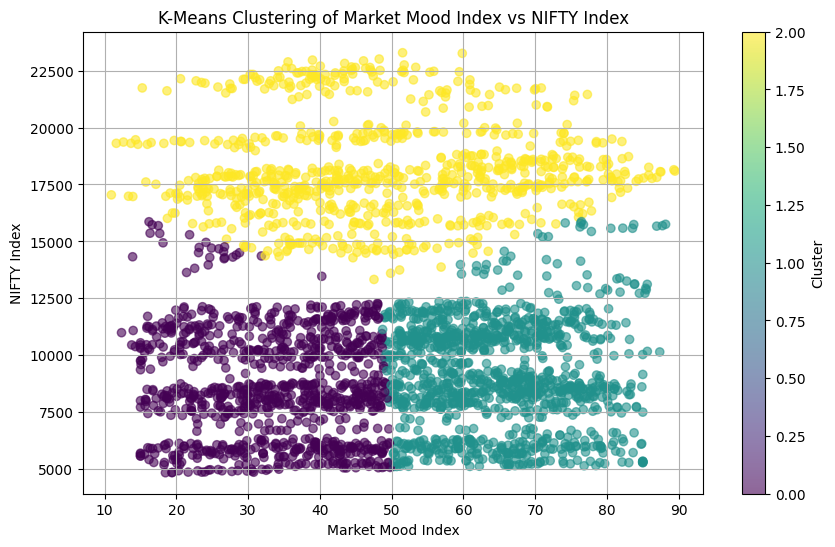

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Market Mood Index'], data['Nifty Index'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Market Mood Index')
plt.ylabel('NIFTY Index')
plt.title('K-Means Clustering of Market Mood Index vs NIFTY Index')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()